#Unsupervised Anomaly Detection with Z Score and Modified Z Score

In the following study, will be analyzed two cases for the anomaly detection or atypical values (outliers) using statistical methods. It will be used the Z Score and Modified Z Score for the anomaly detection.

**First Case -** Student participation in the educational SAT exam in United States applied in students in the year of 2012. The purpose of the SAT is to measure a high school student's readiness for college, and provide colleges with one common data point that can be used to compare all applicants. The main objective is to evaluate which schools presents the worst student's results and therefore can be considered as anomalies if compared to others.

**Second Case -** Determine which soccer players scored more goals in the World Cups between the years of 1930 and 2018. In this case the objective is to analyse which players can be considered as anomalies because of their scores of goals.

All data were preprocessed and save in the CSV format.

## Backend installation and libraries importation:

In [1]:
%matplotlib inline

import sys
import scipy
import scipy.stats as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random 

##First Part - Dataset load
Dataset importation and print for the **First Case**:

In [2]:
ct_test = pd.read_csv('SAT_CT_District_Participation_2012.csv')
print(ct_test.shape)
ct_test.tail()

(130, 2)


,District,Participation Rate
125,Stamford Academy,0.28
126,Connecticut Technical High School System,0.49
127,Norwich Free Academy,0.70
128,The Gilbert School,0.71
129,Woodstock Academy,0.76


##Fundamental features analysis:
After loading the dataset, it's possible to calculate the average, standard deviation and the Z Score. All these values are statistics measures that can be used to detect anomalies.

In [3]:
mean_rate = ct_test['Participation Rate'].mean()
stedv_rate = ct_test['Participation Rate'].std(ddof=0)
zscore_rate = ss.zscore(ct_test['Participation Rate'], ddof=0)

print('Participation Average: {:.3f}'.format(mean_rate))
print('Standard Deviation: {:.3f}'.format(stedv_rate))
ct_test = ct_test.assign(zscore=zscore_rate)
ct_test.tail()

Participation Average: 0.741
Standard Deviation: 0.136


,District,Participation Rate,zscore
125,Stamford Academy,0.28,-3.395374
126,Connecticut Technical High School System,0.49,-1.847124
127,Norwich Free Academy,0.70,-0.298875
128,The Gilbert School,0.71,-0.225148
129,Woodstock Academy,0.76,0.143482


##Data plotting
Now the dataset graphic showing the relation between the Z Score per school can be drawn so the anomalies can be easily visualized for detection.

By the statiscal studies, it's well know that 95% of the values in a normal distribution can be finded around two standard deviations from the mode. So, everything beyond that value can be considered as anomaly.

In this case, the search is for the schools that had the students with the lowest grades in the SAT exam. Therefore, what is wanted are the negatives values of the Z Score.


In [29]:
def plot_anomaly(score_data, threshold):
  score_data = score_data.copy().sort_values(ascending=False).values
  ranks = np.linspace(1, len(score_data), len(score_data))
  mask_outlier = (score_data < threshold)

  plt.figure(dpi=150)
  plt.plot(ranks[~mask_outlier], score_data[~mask_outlier], 'o', color='b', label='Schools with standard scores')
  plt.plot(ranks[mask_outlier], score_data[mask_outlier], 'o', color='r', label='Anomalies')
  plt.axhline(threshold, color='r', label='Limit', alpha=0.5)
  plt.legend(loc = 'lower left')
  plt.title('Z Score x School')
  plt.xlabel('School')
  plt.ylabel('Z Score')
  plt.show()

  

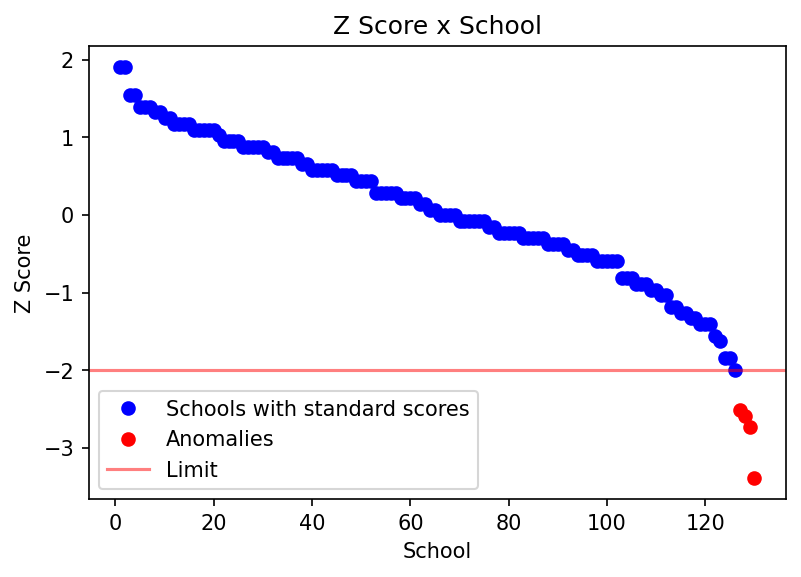

In [30]:
  plot_anomaly(ct_test['zscore'], -2)

##Schools below the limit
With the purpose to see which schools are below the limit, it's printed a table with theirs names.


In [6]:
zscore_anomalies = ct_test[(ct_test['zscore'] < -2)]
zscore_anomalies

,District,Participation Rate,zscore
50,New Britain,0.40,-2.510660
99,Windham,0.37,-2.731839
121,Eastern Connecticut Regional Educational Servi...,0.39,-2.584386
125,Stamford Academy,0.28,-3.395374


##Observation
As showed below, the dataset doesn't follow a normal distribution. Even so, the Z Score can be used to determine which schools can be considered as anomalies because of the students grades.


##Histogram plot
From the histogram plot it can be verified what was said above that the dataset doesn't follow a normal distribution.

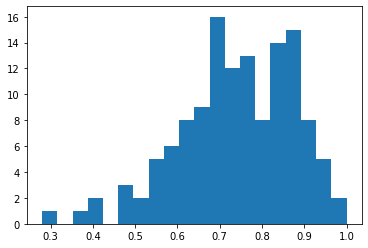

In [7]:
nbins=20
n_hist, bins_hist, patches_hist = plt.hist(ct_test['Participation Rate'], nbins, density=False, cumulative=False, linewidth=1.0, label='data')

##Cumulative distribution function plot
Additionally, the dataset cumulative distribution function can be compared to the cumulative distribution of a normal distribution:

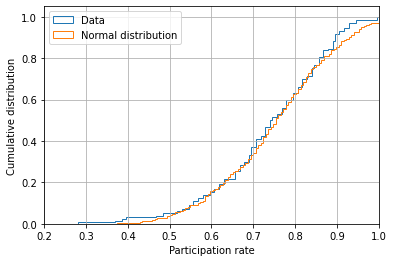

In [22]:
num_bins=130
normal_dist =[random.gauss(mean_rate, stedv_rate) for _ in range (500)]
n, bins, patches = plt.hist(ct_test['Participation Rate'], num_bins, density = True, histtype = 'step', cumulative=True, linewidth = 1.0, label = 'Data')
plt.hist(normal_dist, num_bins, density = True, histtype = 'step', cumulative = True, linewidth = 1.0, label = 'Normal distribution')
plt.grid(True)
plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0.2,1.0])
plt.xlabel('Participation rate')
plt.ylabel('Cumulative distribution')
plt.show()

##First part conclusion
Although the dataset are inconsistent with a normal distribution, the Z Score was useful to help to identify the anomalies.

Therefore, despite the fact that no statiscal affirmation can be made using the Z Score as base, the four schools with the lowest Z Score are for sure the anomalies.

##Second Part - Dataset load
Dataset load and print for the **second case**:

In [9]:
top_goals = pd.read_csv('world_cup_top_goal_scorers.csv', encoding = 'utf-8', names = ['Year', 'Player(s)', 'Goals'], skiprows = 1)
top_goals.head()

,Year,Player(s),Goals
0,1930,Guillermo Stábile,8
1,1934,Oldřich Nejedlý,5
2,1938,Leônidas,7
3,1950,Ademir,8
4,1954,Sándor Kocsis,11


##Fundamental features analysis:
After loading the dataset, it's possible to calculate the average, standard deviation and the Z Score.

In [10]:
mean_goals = top_goals['Goals'].mean()
stdev_goals = top_goals['Goals'].std(ddof = 0)
zscore_goals = ss.zscore(top_goals['Goals'], ddof = 0)

print('Average of goals: {:.2f}'.format(mean_goals))
print('Standard deviation: {:.2f}'.format(stedv_rate))
top_goals = top_goals.assign(zscore = zscore_goals)
top_goals.head()

Average of goals: 7.05
Standard deviation: 0.14


,Year,Player(s),Goals,zscore
0,1930,Guillermo Stábile,8,0.443242
1,1934,Oldřich Nejedlý,5,-0.952971
2,1938,Leônidas,7,-0.022162
3,1950,Ademir,8,0.443242
4,1954,Sándor Kocsis,11,1.839455


##Data plotting
Now, the dataset graphic showing the relation between the Z Score per player can be drawn so the anomalies can be easily visualized for detection.

Again, by the statiscal studies, it's well know that 95% of the values in a normal distribution can be finded around two standard deviations from the mode. So, everything beyond that value can be considered as anomaly.

In this second case, the search is for the players who scored the most in the world cups. Therefore, what is wanted are the positives values of the Z Score.

In [25]:
def plot_anomaly_goals (score_data, threshold):
  score_data = score_data.copy().sort_values(ascending = False).values
  ranks = np.linspace(1, len(score_data), len(score_data))
  mask_outlier = (score_data > threshold)

  plt.figure (dpi = 150)
  plt.plot (ranks[~mask_outlier], score_data[~mask_outlier], 'o', color = 'b', label = 'Typical players')
  plt.plot (ranks[mask_outlier], score_data[mask_outlier], 'o', color = 'r', label = 'Anomaly')
  plt.axhline (threshold, color = 'r', label = 'Limite', alpha = 0.5)
  plt.legend (loc = 'upper right')
  plt.title ('Z Score x Player', fontweight = 'bold')
  plt.xticks (np.arange(0, 21, step = 2.0))
  plt.xlabel ('Player')
  plt.ylabel ('Z-Score')
  plt.show()

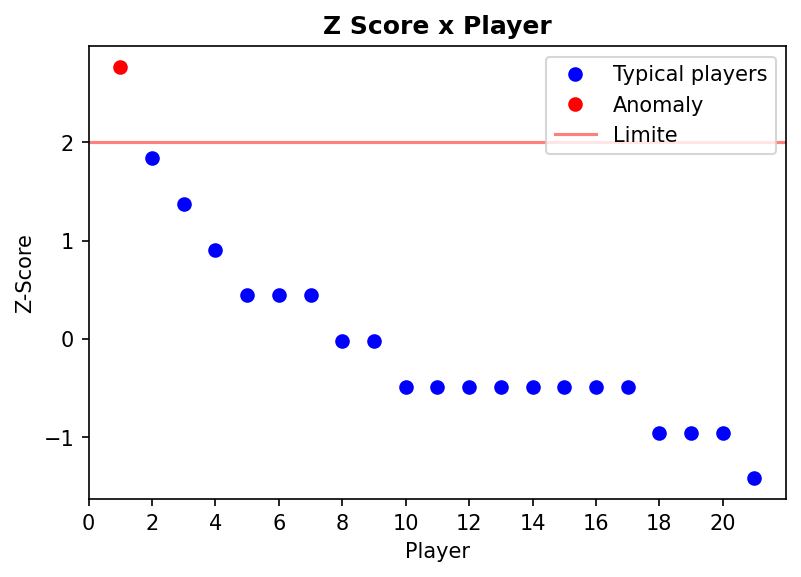

In [26]:
plot_anomaly_goals(top_goals['zscore'], 2)

##Players above the limit
With the purpose to see which players are above the limit, it's printed a table with theirs names.

In [13]:
zscore_anomalies_players = top_goals[(top_goals['zscore'] > 2)]
zscore_anomalies_players

,Year,Player(s),Goals,zscore
5,1958,Just Fontaine,13,2.770264


##Observation
The player selected before scored so many goals that modified in a significant way the average and the standard deviation.

For this motive, this time will be used the Modified Z Score.

The difference between the Z Score and the Modified Z Score it's while the first use the mean to calculate itself, the second uses the median. For that reason, the next step is to calculate the median:

In [14]:
median_goals = np.median(top_goals['Goals'])
median_goals

6.0

##Function to calculate the Modified Z Score

In [15]:
def modified_zscore (data, consistency_correction = 1.4826):
  median = np.median(data)
  deviation_from_med = np.array(data) - median
  mad = np.median(np.abs(deviation_from_med))
  mod_zscore = deviation_from_med/(consistency_correction)
  return mod_zscore, mad

##Data printing with Modified Z Score
After the calculation of the Modified Z Score, it's possible to print the Z Score and the Modified Z Score to compare then.

In [16]:
mod_zscore_goals, mad_goals = modified_zscore(top_goals['Goals'])
top_goals = top_goals.assign(mod_zscore = mod_zscore_goals)
top_goals.head()

,Year,Player(s),Goals,zscore,mod_zscore
0,1930,Guillermo Stábile,8,0.443242,1.348982
1,1934,Oldřich Nejedlý,5,-0.952971,-0.674491
2,1938,Leônidas,7,-0.022162,0.674491
3,1950,Ademir,8,0.443242,1.348982
4,1954,Sándor Kocsis,11,1.839455,3.372454


####Data plotting
Now the graphic showing the relation between the Modified Z Score per player can be drawn so the anomalies can be easily visualized for detection.

This time, it will be used a value of two times the Modified Z Score to drawn the limit that separate the standard values from the anomalies.

In [17]:
def plot_anomaly_goals_2 (score_data, threshold):
  score_data = score_data.copy().sort_values(ascending = False).values
  ranks = np.linspace(1, len(score_data), len(score_data))
  mask_outliers = (score_data > threshold)

  plt.figure (dpi = 150)
  plt.plot (ranks[~mask_outliers], score_data[~mask_outliers], 'o', color = 'b', label = 'Typical players')
  plt.plot (ranks[mask_outliers], score_data[mask_outliers], 'o', color = 'r', label = 'Anomaly')
  plt.axhline (threshold, color = 'r', label = 'Limite', alpha = 0.5)
  plt.legend (loc = 'upper right')
  plt.title ('Modified Z Score x Players', fontweight = 'bold')
  plt.xticks (np.arange(0, 21, step = 2.0))
  plt.xlabel('Player')
  plt.ylabel('Modified Z Score')
  plt.show()

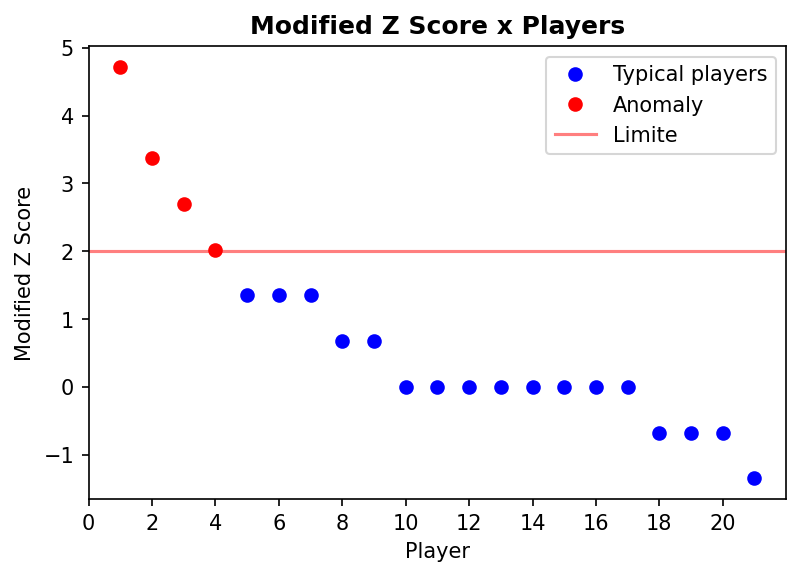

In [18]:
plot_anomaly_goals_2(top_goals['mod_zscore'], 2)

##Players above the limit
With the purpose to see which players are above the limit, it's printed a table with theirs names again.

In [19]:
mod_zscore_anomalies_players = top_goals[(top_goals['mod_zscore'] > 2)]
mod_zscore_anomalies_players

,Year,Player(s),Goals,zscore,mod_zscore
4,1954,Sándor Kocsis,11,1.839455,3.372454
5,1958,Just Fontaine,13,2.770264,4.721435
7,1966,Eusébio,9,0.908647,2.023472
8,1970,Gerd Müller,10,1.374051,2.697963


##Second part conclusion
In this second part, it was possible to notice that when a value is to different from the others, in a first analysis, it is considered the only anomaly in the dataset.

For this second case, to detect the most part of the anomalies, it was necessary to use another statistical measure, the Modified Z Score.

Therefore, it become clear the the choose of the right statistical feature it is highly relevant to verify which data can be considered as anomalies.